In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from collections import Counter
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

# Load metadata

In [2]:
df = pd.read_csv("metadata.csv")[['SampleID','OralFraction','MicrobiotaDensity','Group']]
df['log10_OralFraction'] = np.log10(df.OralFraction)
df['log10_MicrobiotaDensity'] = np.log10(df.MicrobiotaDensity)
df.head()

,SampleID,OralFraction,MicrobiotaDensity,Group,log10_OralFraction,log10_MicrobiotaDensity
0,ERR2015047,0.000826,1.900000e+11,HC,-3.083099,11.278754
1,ERR2015048,0.101783,1.480000e+11,HC,-0.992326,11.170262
2,ERR2015049,0.001470,1.170000e+11,HC,-2.832611,11.068186
3,ERR2015050,0.000000,1.530000e+11,HC,-inf,11.184691
4,ERR2015051,0.000304,1.060000e+11,HC,-3.516721,11.025306


# Fig. 4

slope = -0.30, r = -0.41, P = 0.000013, std_err = 0.07


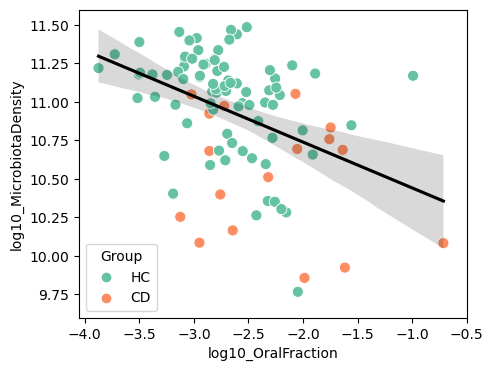

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

df2 = df[df.OralFraction > 0]

_ = sns.scatterplot(x="log10_OralFraction", y="log10_MicrobiotaDensity", data=df2, hue='Group', palette='Set2', s=64, ax=ax)
_ = sns.regplot(x="log10_OralFraction", y="log10_MicrobiotaDensity", data=df2, scatter=False, color='k', ax=ax)

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(df2['log10_OralFraction'], df2['log10_MicrobiotaDensity'], alternative='less')
print('slope = %2.2f, r = %2.2f, P = %2.6f, std_err = %2.2f'%(slope, r_value, p_value, std_err))

_ = ax.set_xlim([-4.05, -0.5])
_ = ax.set_ylim([9.6, 11.6])

In [4]:
Counter(df.Group)

Counter({'HC': 106, 'CD': 29})

In [5]:
Counter(df2.Group)

Counter({'HC': 80, 'CD': 17})

oral fraction: P= 0.012111503088109165 Cohen'd= 0.4355191076803017
microbiota density: P= 4.194312761781222e-06 Cohen'd= 1.4290073857400987


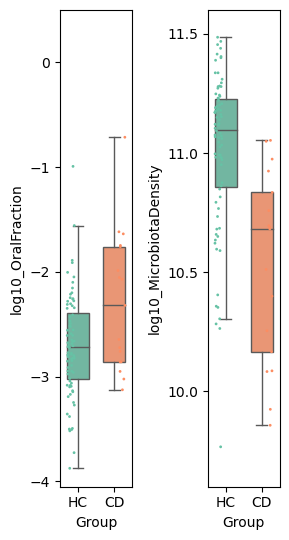

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(3,5.5))

# oral cavity
_ = sns.boxplot(y="log10_OralFraction", x="Group", data=df2, width=.6, ax=ax[0], order=['HC','CD'], palette='Set2', linewidth=1, showfliers=False)
_ = sns.stripplot(y="log10_OralFraction", x="Group", data=df2, size=2, color=".3", linewidth=0, ax=ax[0], jitter=0.2, palette='Set2', dodge=True, order=['HC','CD'])
_ = ax[0].set_ylim([-4.05,0.5])
_ = ax[0].set_yticks([-4,-3,-2,-1,0])

# P value and Effect size
res = mannwhitneyu(x=df2[df2.Group=='HC'].OralFraction, y=df2[df2.Group=='CD'].OralFraction, alternative='less')
variances = df2[['Group','OralFraction']].groupby('Group').var(ddof=1)
mean_var = variances.mean().values[0]
s_pooled = np.sqrt(mean_var)
diff_mean = abs(df2[['Group','OralFraction']].groupby('Group').mean().diff().values[-1])[0]
cohens_d = diff_mean / s_pooled
print('oral fraction:', 'P=', res[1], 'Cohen\'d=', cohens_d)

# microbiota load
_ = sns.boxplot(y="log10_MicrobiotaDensity", x="Group", data=df2, width=.6, ax=ax[1], order=['HC','CD'], palette='Set2', linewidth=1, showfliers=False)
_ = sns.stripplot(y="log10_MicrobiotaDensity", x="Group", data=df2, size=2, color=".3", linewidth=0, ax=ax[1], jitter=0.2, palette='Set2', dodge=True, order=['HC','CD'])
_ = ax[1].set_ylim([9.6,11.6])
_ = ax[1].set_yticks([10,10.5,11,11.5])

# P value and Effect size
res = mannwhitneyu(x=df2[df2.Group=='HC'].MicrobiotaDensity, y=df2[df2.Group=='CD'].MicrobiotaDensity, alternative='greater')
variances = df2[['Group','MicrobiotaDensity']].groupby('Group').var(ddof=1)
mean_var = variances.mean().values[0]
s_pooled = np.sqrt(mean_var)
diff_mean = abs(df2[['Group','MicrobiotaDensity']].groupby('Group').mean().diff().values[-1])[0]
cohens_d = diff_mean / s_pooled
print('microbiota density:', 'P=', res[1], 'Cohen\'d=', cohens_d)

plt.tight_layout()